In [1]:
import numpy as np
import fabio
import matplotlib.pyplot as plt
import pyFAI
import pyFAI.geometry
import os

<IPython.core.display.Javascript object>


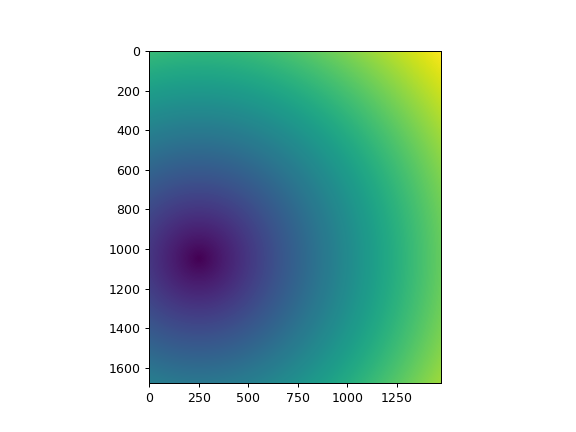

<IPython.core.display.Javascript object>


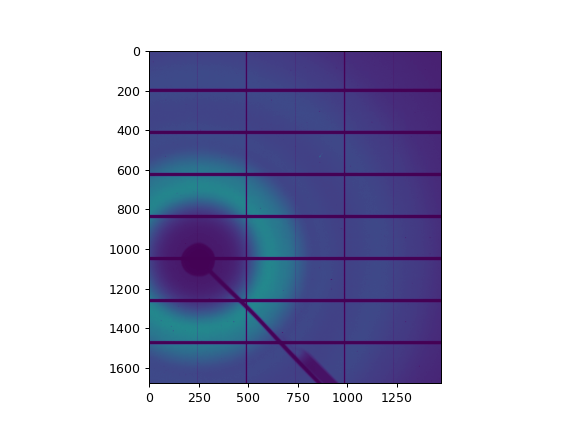

<IPython.core.display.Javascript object>


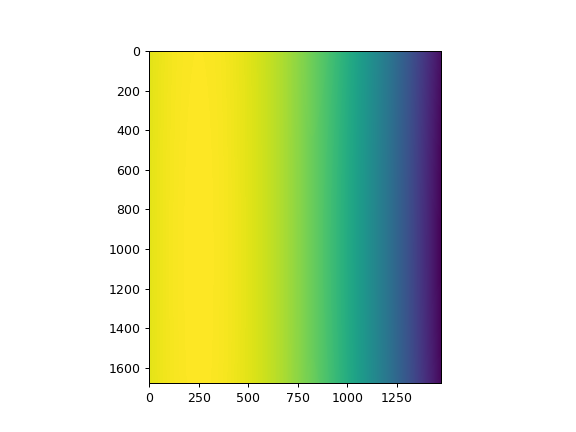

In [22]:
file2th = r'C:\Users\kenneth1a\Documents\beamlineData\Feb2023_gainMap\Si\xrd\maps\pyfai/Si_700_dty_179_2thmap.edf'
polfile = r'C:\Users\kenneth1a\Documents\beamlineData\Feb2023_gainMap\Si\xrd\maps\pyfai/Si_700_dty_179_polmap.edf'
datafile = r'C:\Users\kenneth1a\Documents\beamlineData\Feb2023_gainMap\glass2\pos1/glass_700_dty_179_000_0008p.cbf'
array2th = fabio.open(file2th).data
dataarray = fabio.open(datafile).data
polarray  = fabio.open(polfile).data
plt.figure()
plt.imshow(array2th)
plt.figure()
plt.imshow(dataarray)
plt.figure()
plt.imshow(polarray)

<BarContainer object of 500 artists>

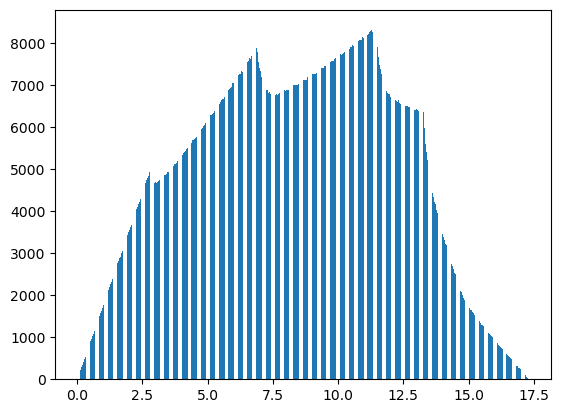

In [23]:
%matplotlib inline
hist = np.histogram(array,bins = 500)
plt.bar(hist[1][1:],hist[0],width = 0.02)

In [29]:
bins = 800
binsize = np.max(array2th)/bins
binarray = (array2th/binsize).astype(np.uint16)
binarray = np.where(dataarray < 0, -1, binarray)

<IPython.core.display.Javascript object>


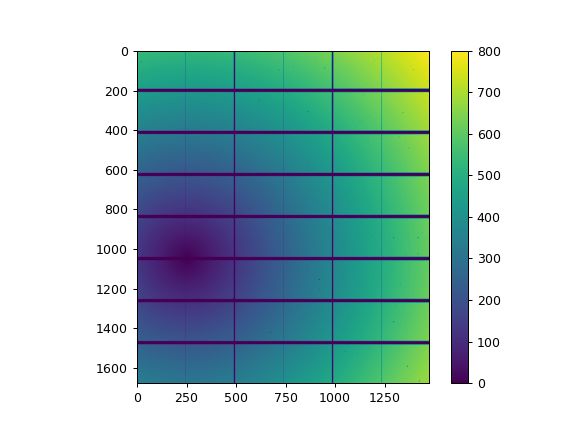

In [30]:
%matplotlib nbagg
plt.imshow(binarray)
plt.colorbar()

<IPython.core.display.Javascript object>


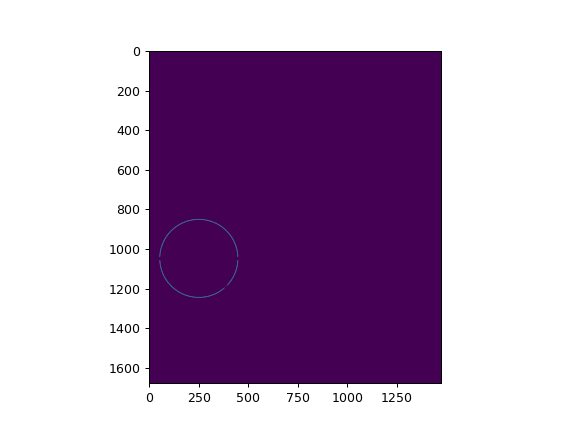

In [31]:
plt.figure()
plt.imshow(np.where(binarray == 100, dataarray,0))

In [32]:
mask = fabio.open(r'C:\Users\kenneth1a\Documents\beamlineData\Feb2023_gainMap/minMask.edf').data

for n in range(bins):
    array = np.where(binarray == n, dataarray, np.nan)/polarray
    stdev = np.nanstd(array)
    median = np.nanmedian(array)
    mask = np.where(array > median + 3*stdev, 1, mask)


<IPython.core.display.Javascript object>


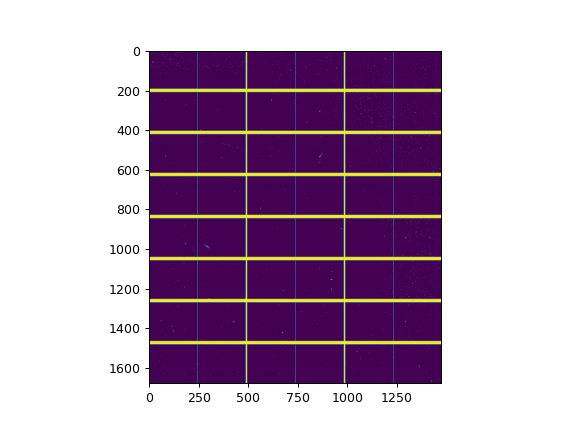

<IPython.core.display.Javascript object>


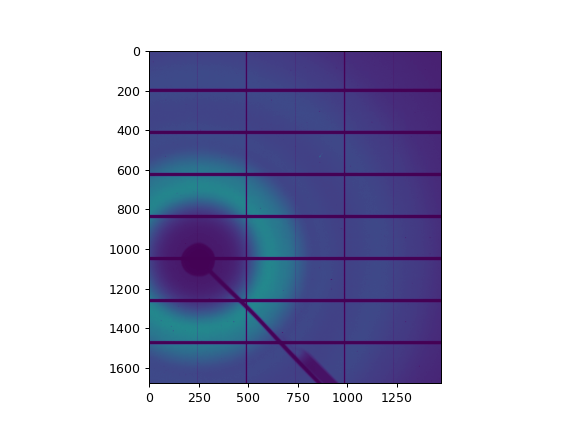

In [33]:
plt.figure()
plt.imshow(mask)
plt.figure()
plt.imshow(dataarray)